### *Statistics for AI and Data Science*

by Danielle Souza Da Silva

#### **Introduction:**

This notebook presents an analysis of the texas bridge data, which shows the percentage of truck traffic, age of the bridges, the material that the bridges were mainly built of, their designs, average daily traffic and their current condition given by scores. The aim of the analysis is to find out how well the proposed variables can predict the bridge condition and which of the proposed variables has more influence on the current condition.


##### **Table of Contents**

1. Section 1: Data Preparation

  * Section 1.1: The Age variable
  
  * Section 1.2: The current condition variable
 
  * Section 1.3: Outliers Reduction Method and Justification
   
  * Section 1.4: Reducing the number of Materials categories
   
  * Section 1.5: Reducing the number of Design categories
   
  * Section 1.6: Prepared Data Frame
    
2. Section 2: Exploratory Analysis

  * Section 2.1: Material vs Age, Design vs Age, Material and Design data
      
  * Section 2.2: Percent Truck & Current Condition
  
  * Section 2.3: Average use vs Current Condition
  
  * Section 2.4: Variable correlation and Age vs Current Condition
  
  
3. Section 3: Regression Modelling

  * Section 3.1: Coefficient of Determination
  
  * Section 3.2: Regression Coefficients
  
  * Section 3.3: Distribution of residuals (errors)
  
  * Section 3.4: Actual Values vs Predicted Values scatterplot
  
4. Conclusion
   
 

 #### **Section 1: Data Preparation**

The dataframe (df) which was created in this section contains the variables: Age, Average use, Percent trucks, Material, Design and Current Condition. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline

In [2]:
bridges = pd.read_csv('tx19_bridges_sample.csv')

In [3]:
# Selecting variables from bridges dataframe and renaming some variables

var_bridges = ['Structure_id', 'Year', 'AverageDaily', 'Trucks_percent', 'Material', 'Design', 
               'Deck_rating','Superstr_rating',
      'Substr_rating','Historic']
df = bridges.loc[:,var_bridges]
df.rename(columns={'AverageDaily': 'Average use', 'Trucks_percent': 'Percent Truck'}, inplace = True)

##### **Section 1.1: The Age Variable**

The Age variable was derived by subtracting 2021 from the year that the bridges were built, by using the Year variable from the bridges dataframe. 

Age = 2021 - Year

In [4]:
# Working Age of bridges from 2021

df['Age 2021']= 2021 - df['Year']

##### **Section 1.2: The Current Condition Variable**

To create the Current Condition variable, I have set each rating from the three ratings observations (Deck_rating, Superstr_rating, Substr_rating) to a rating score. The scores given to each rating are as follows:

1. Failed: 0
2. Failing: 1
3. Serious: 2
4. Critical: 3
5. Poor: 4
6. Fair: 5
7. Satisfactory: 6
8. Good: 7
9. Very Good: 8
10. Excellent: 9

After the Deck_rating, Superstr_rating, Substr_rating rating observations were each assigned a rating score, I have used the sum of their ratings to derive the current condition values. So we have: **Deck_rating** + **Superstr_rating** + **Substr_rating** = **Current Condition** 

We should note that there are exactly five missing values on the Deck_rating column and two on the Superstr_rating column. This has caused our Current Condition variable to have seven missing values which will be ignored due to the data size that we are working with. Therefore, I have removed these null values from the data set to facilitate the regression analysis which will be done later. 

##### **Replacing Ratings with scores**

In [5]:
# Replacing ratings with scores 

df.replace('Failed',0,inplace=True)
df.replace('Failing',1,inplace=True)
df.replace('Serious',2,inplace=True)
df.replace('Critical',3,inplace=True)
df.replace('Poor',4,inplace=True)
df.replace('Fair',5,inplace=True)
df.replace('Satisfactory',6,inplace=True)
df.replace('Good',7,inplace=True)
df.replace('Very Good',8,inplace=True)
df.replace('Excellent',9,inplace=True)

# Merging rating scores to create Current Condition

df['Current Condition'] = (df['Deck_rating'] + df['Superstr_rating'] + df['Substr_rating'])

##### **Null Values Total & dropping Null values**

In [6]:
df.isnull().sum()

Structure_id         0
Year                 0
Average use          0
Percent Truck        0
Material             0
Design               0
Deck_rating          5
Superstr_rating      2
Substr_rating        0
Historic             0
Age 2021             0
Current Condition    7
dtype: int64

In [7]:
df = df.dropna()

**Section 1.3: Outliers Reduction Method and Justification**

To reduce number of outliers, I have observed the distributions of the box plot and the describe table of the data frame (below). The box blot shows the distribution of the Historic categories by age of the bridges. 

We can see that the bridges which had categories 'Possible' or 'Register on the box plot had distributions tending more to the higher age side. Whereas the 'Not Historic' and 'Unknown' distributions of age showed the opposite, tending to the lower side of the box plot. This implies that the possible historic and historic bridges tend to be older. On the describe table, I have also observed that the 75th quartile of the Age variable has a value of 57 years, which is similar to the maximum number shown on the box plot for the 'Not historic' and 'Unknown' categories which is around 60. Also, the 'Not historic' box plot shows that outliers start from 60 years old or older. With the recommendation to remove very old bridges, I have based my calculation to reduce the number of outliers by these results. Therefore, I have reduced the outliers by observing the historic and age data distributions (75th quartile, maximum values, outliers), which resulted in removing the threshold age of bridges which are older than 60 years old. 

Furthermore, by doing further research to find what defines a historic bridge I have found on the Texas government website that there are three attributes that define a historic property (which includes bridges). One of the attributes is age, there is a 50 year rule that applies (baring in my mind that there are some exceptions) however with this information we can clearly see below the outliers on the 'Register' category for bridges with less than 50 years old. Therefore, it is reasonable to exclude categorised bridges ('Register' and 'Possible' historic) that are less than 50 years old, since they may have been entered incorrectly in the data. 

*Reference: https://www.thc.texas.gov/preserve/buildings-and-property*

In [8]:
df.describe()

,Year,Average use,Percent Truck,Deck_rating,Superstr_rating,Substr_rating,Age 2021,Current Condition
count,34286.000000,34286.000000,34286.000000,34286.000000,34286.000000,34286.000000,34286.000000,34286.000000
mean,1981.497083,11630.138453,8.577787,6.828268,6.883043,6.587237,39.502917,20.298548
std,23.860336,24232.756674,10.347690,0.726924,0.871418,0.834340,23.860336,2.009428
min,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1964.000000,330.000000,0.000000,6.000000,6.000000,6.000000,19.000000,19.000000
50%,1985.000000,3290.000000,5.000000,7.000000,7.000000,7.000000,36.000000,21.000000
75%,2002.000000,11870.000000,13.000000,7.000000,7.000000,7.000000,57.000000,22.000000
max,2019.000000,543000.000000,99.000000,9.000000,9.000000,9.000000,121.000000,27.000000


Text(0.5, 1.0, 'Age Distributiom of Historic Categories')

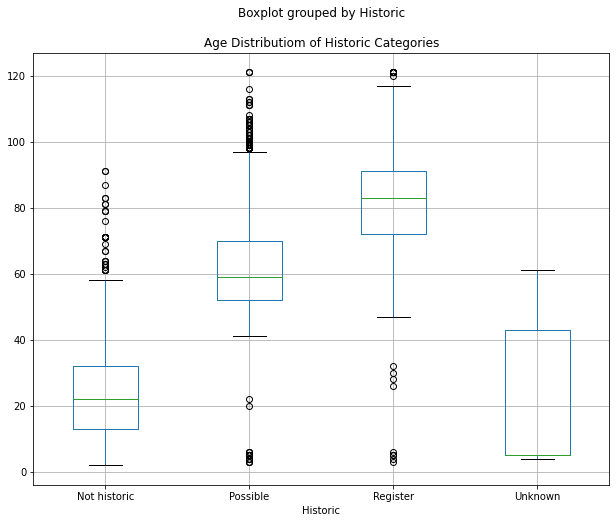

In [9]:
df.boxplot(column='Age 2021', by='Historic', figsize=(10,8)).set_title('Age Distributiom of Historic Categories')

##### **Reducing the number of outliers (Explanation above)**

In [10]:
outlier1 = df[ (df['Age 2021'] > 60) ].index
outlier2 = df[ (df['Historic'] == 'Register') | (df['Historic']=='Possible')].loc[(df['Age 2021']<50)].index


df.drop(outlier1 , inplace=True)
df.drop(outlier2 , inplace=True)

**Section 1.4: Reducing the number of Materials categories**

To reduce the  number of categories of Materials, I have looked at the total amount of bridges that have each material. The following list shows the total amount of bridges that have the dominant material that the bridge was built on:

+ Concrete: 27128
+ Timber: 465
+ Steel: 6639
+ Masonry: 13
+ Other: 48

Based on this result, I have decided to merge the Masonry category with the 'Other' category because there are a smaller amount of bridges which had this material as a dominant material in which they were built on.

In [11]:
# Replacing small categories of Material to 'Other'

df.replace('Masonry','Other',inplace=True)

##### **Section 1.5: Reducing the number of Design categories**

To reduce the number of  categories of Design, I have also looked at the total amount of bridges that have each design. The following list shows the total amount of bridges that had the designs:

+ Slab: 4340
+ Beam: 28326
+ Truss: 137
+ Arch: 160
+ Suspension: 5
+ Frame: 68
+ Movable: 13
+ Other: 1244

Based on this result, I have merged the designs: Truss, Frame, Movable and Suspension into the 'Other' category since there are smaller amount of bridges with these designs compared to the others. Since the size of our data is quite large compared to the total amount that's being merged, this would not affect our analysis later on. 

In [12]:
# Replacing small categories of Design to 'Other'

df.replace('Truss','Other',inplace=True)
df.replace('Frame','Other',inplace=True)
df.replace('Movable','Other',inplace=True)
df.replace('Suspension','Other',inplace=True)

##### **Section 1.6: Prepared Data Frame (df)**

After preparing the dataframe by creating new variables and reducing categories, the result is the following dataframe (df):

In [13]:
df

,Structure_id,Year,Average use,Percent Truck,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Historic,Age 2021,Current Condition
0,000021521-00101,2005,1,0.0,Concrete,Slab,7.0,8.0,8,Not historic,16,23.0
1,000021521-00181,2005,1,0.0,Concrete,Slab,7.0,7.0,8,Not historic,16,22.0
2,000021521-TMP20,2012,100,0.0,Concrete,Beam,8.0,8.0,8,Not historic,9,24.0
4,000021580-00092,2004,150,4.0,Concrete,Beam,7.0,8.0,8,Not historic,17,23.0
5,000021580-00093,2005,150,4.0,Concrete,Beam,8.0,8.0,8,Not historic,16,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34288,DAPFORHOO000012,1994,300,40.0,Concrete,Beam,7.0,7.0,7,Not historic,27,21.0
34289,DAPFORHOO000013,2000,300,40.0,Concrete,Beam,7.0,7.0,7,Not historic,21,21.0
34290,DAPFORHOO000015,1996,1200,25.0,Concrete,Beam,7.0,7.0,7,Not historic,25,21.0
34291,DAPFORHOO00005A,1991,300,15.0,Concrete,Beam,7.0,7.0,6,Not historic,30,20.0


 #### **Section 2: Exploratory Analysis**

**Section 2.1: Material vs Age, Design vs Age, Material and Design data**

In this section, I have observed the relationship between the Material vs Age distributions and Design vs Age distribution using box plots.

*Material vs Age:*

The box plot shows that the concrete material is normally distributed between the ages that the bridges were built as its box plot shape is symmetric. This may imply that concrete is not only a popular material but also one that has been mostly preferred as the dominant material that bridges may be built from. We can also see that the distribution of steel is similar to that of concrete. However the median number of bridges built predominantly from steel compared to concrete is slightly lower and its 25th quartile slightly higher. The box blot for the timber material shows that its distribution is much smaller than concrete and steel making it a less popular material. 

*Design vs Age:*

The box blot for the Beam design is symmetric showing a normal distribution. As with concrete we can assume that this design has been one of the mostly preferred throughout the all the age years. We also can see it is a similar case for the Slab material, but the Slab material distribution is slightly skewed due to its median being on the upper level of ages, which may imply that this design may have been more popular for slightly older bridges. The Arch design has a few outliers showing that only a few bridges of forty years or older had this design, but the box plot mostly shows that this design is being used for younger bridges. 

Text(0, 0.5, 'Age')

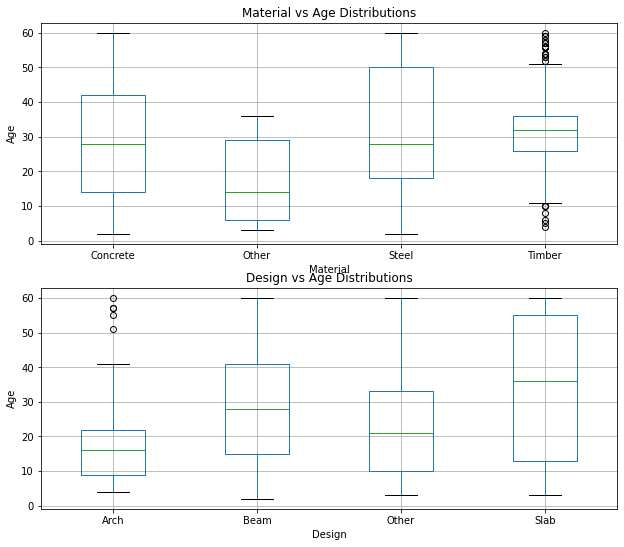

In [14]:
fig, (a1, a2) = plt.subplots(2,1, figsize=(10,9))

df.boxplot(column='Age 2021', by='Material', ax=a1)
df.boxplot(column='Age 2021', by='Design', ax=a2)

# Make the plots a bit clearer
fig.suptitle('')
a1.set_title('Material vs Age Distributions')
a2.set_title('Design vs Age Distributions')
a1.set_ylabel('Age')
a2.set_ylabel('Age')

The graph data below we can compare the differences in totals between the material and design categories. We can see that there is a big difference on the amount of bridges in which are predominantly made out of concrete and the Beam design. 

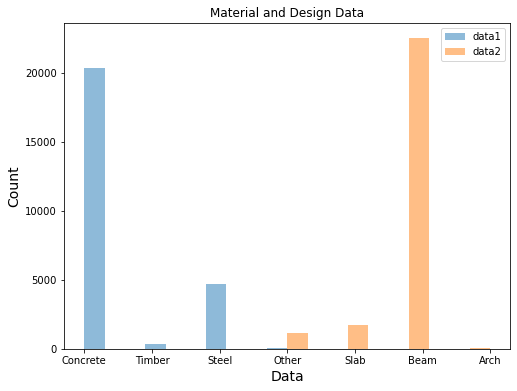

In [15]:
plt.figure(figsize=(8,6))
plt.hist(df['Material'], alpha=0.5, label="data1")
plt.hist(df['Design'], alpha=0.5, label="data2")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Material and Design Data")
plt.legend(loc='upper right')

I have derived a joint distribution cross table of materials given designs (below), and with this cross table I have created a Materials given Design bar graph (below). On this graph, we are able to visualise the distribution of which materials were used for which designs of bridges. We can see that the bridges with the beam design had mainly concrete as its predominant material when built. We can also see this is the same case for steel, which also was mainly used to build bridges with the beam design. We can see that the slab design was mainly built with concrete material too. The bridges which had the arch design were much less popular, however the cross table did show that the materials mainly chosen for it to be built from were concrete and steel. 

In [16]:
mat_given_des = pd.crosstab(df.Material, [df.Design], normalize=False)
mat_given_des

Design,Arch,Beam,Other,Slab
Material,,,,
Concrete,41,17730,835,1718
Other,6,0,34,0
Steel,34,4396,276,0
Timber,0,380,0,0


Text(0.5, 1.0, 'Materials given Design Bar Graph')

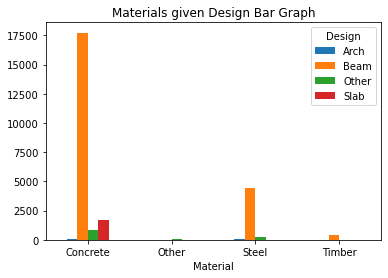

In [17]:
mat_given_des.plot(kind='bar', subplots=False,rot=0, stacked = False).set_title('Materials given Design Bar Graph', fontsize = 12)

To further our data knowledge on materials and design data I have also generated  bar graphs showing their distribution across our current condition scores. 

We can see that the concrete material and beam design has very similar distribution across the scores. A large number of bridges built from concrete had a score of 21/27 which translates to a 'Good' condition, when using the rating scores calculated in section 1.2. We can also observe that the steel material had a main score of 19/27 which translate to a 'Satisfactory' rating. These distribution clearly show that the concrete material give better current condition scores compared to other materials, and since the beam design was mainly build from concrete as seen previously, the same is implied for this design.

Text(0.5, 1.0, 'Distribution of Designs given Current Condition scores (plot 2)')

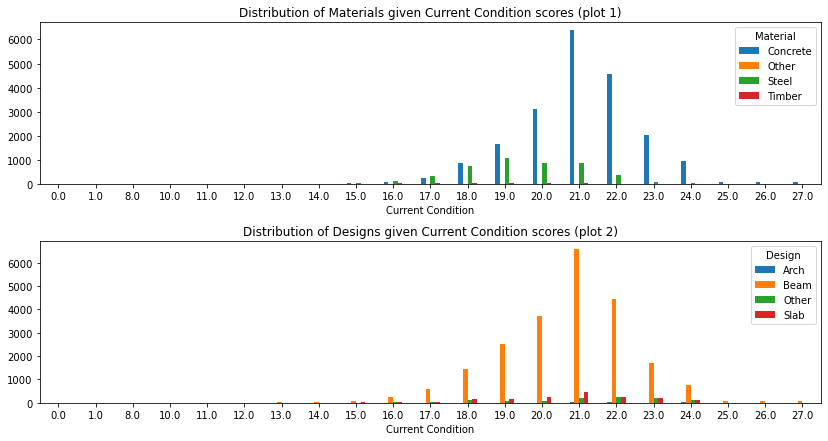

In [18]:
matcc = pd.crosstab(df['Current Condition'], [df.Material], normalize=False)
descc = pd.crosstab(df['Current Condition'], [df.Design], normalize=False)

fig,(a1, a2) = plt.subplots(2,1,figsize=(14,7), sharey=False, sharex=False)
fig.subplots_adjust(hspace=0.35)

# Plot one tabulation on each axis WITH CAREFUL TITLES
matcc.plot(kind='bar', subplots=False, ax=a1, rot=0)
a1.set_title('Distribution of Materials given Current Condition scores (plot 1)', fontsize=12)

descc.plot(kind='bar', subplots=False, ax=a2, rot=0)
a2.set_title('Distribution of Designs given Current Condition scores (plot 2)', fontsize=12)

**Section 2.2: Percent Truck & Current Condition**

In this section, I have observed the relationship between the percentage of traffic made up of trucks on bridges with the current condition scores. The scatterplot shows no correlation between the two implying there may be no relationship. This may be because the trucks percentage traffic may have changed throughout time so there may be other factors in which we need to carefully take into consideration before deciding if there is a relationship or not. Our data does not have anymore details about traffic developments throughout time so we won't make any assumptions about the relationship between truck traffic percentage and current condition. 

Text(0.5, 1.0, 'Current Condition vs Percent Truck Traffic')

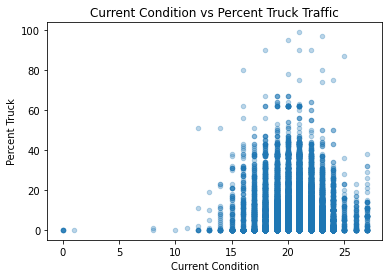

In [19]:
df.plot(kind='scatter', x='Current Condition', y='Percent Truck',alpha = 0.3).set_title('Current Condition vs Percent Truck Traffic')

**2.3 Average use vs Current Condition**

To be able to extract more information about the Average use and Current Condition I have derived a cross table to show the distribution of the average use total for each current condition category. Then, I have plotted a bar graph so that we are able to visually see their distributions. 

The graph below shows the distribution of the average use total across the current condition scores. The data shows us that the highest average use count had a score of 21/27 which translates to a 'Good' score. This may imply that the average use numbers may not impact the current condition as much as it may have been expected. This is because the more something is used the more we expect it to not work as well after a while. Having said that, I do believe we need some more data before deciding if there is a relationship between the current condition and average use.

Text(0.5, 1.0, 'Average use across Current Condition Score')

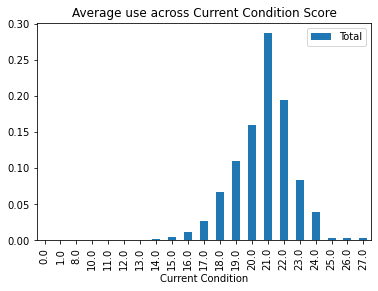

In [20]:
aver_cc = pd.crosstab(df['Current Condition'],[df['Average use']],normalize=True )
aver_cc1 = pd.DataFrame().assign(Total = aver_cc.apply(sum, axis=1))
aver_cc1.plot(kind='bar').set_title('Average use across Current Condition Score')

**Section 2.4: Variable correlation and Age vs Current Condition**

In this section, I have generated a heat map to visualise the correlation between the predictors and target. 

The heat map shows us that the current condition (target) is mainly correlated with the Year or Age of bridges, having a correlation coefficient of 0.55 and -0.55 respectively. This may imply that as bridges get older the current condition may tend to get worse. I have generated a scatter graph between the age and the current condition (below), and this assumption may be confirmed since the graph shows that the older the bridges get its current condition score dropped slightly. 

*Note: The heat map also shows strong correlation between the current condition and the three ratings Deck_rating, Superstr_rating, Substr_rating, but this is mainly because the current condition was derived from these three ratings.*

**Heat Map containing correlation between variables**

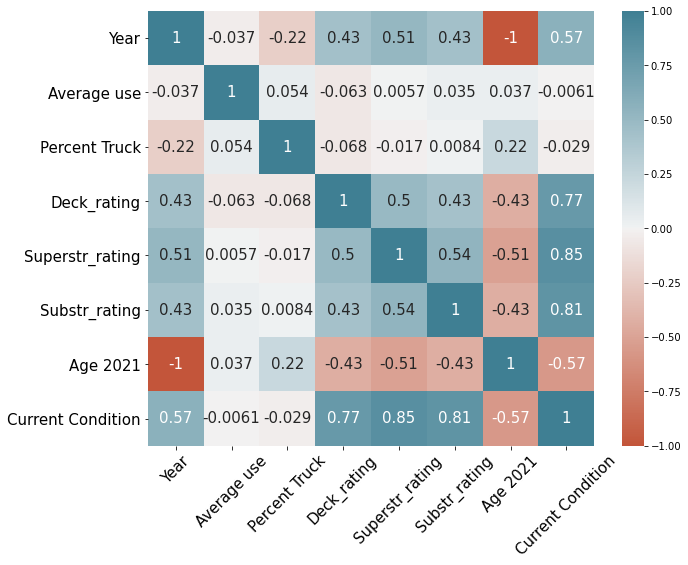

In [21]:
fig,ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize=15)

Text(0.5, 1.0, 'Age 2021 vs Current Condition')

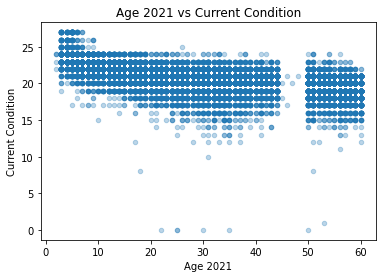

In [22]:
df.plot(kind='scatter', x='Age 2021', y='Current Condition',alpha = 0.3).set_title('Age 2021 vs Current Condition')

#### **Section 3: Regression Modelling**

On this section we will be using linear regression to understand beeter the effect of the five predictor variables on the target variables. 

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [24]:
y = df['Current Condition'] # this is the target variable; we assue just one though more are possible
X = np.column_stack((df['Average use'],df['Percent Truck'],df['Age 2021']))

CMat = pd.get_dummies(df['Material'], drop_first=True)
CDes = pd.get_dummies(df['Design'], drop_first=True)

**Section 3.1: Coefficient of Determination**

On this part, I have derived the *coefficient of determination* $R^2$ which, by definition, ranges from zero to one and measures the proportion of variability of one factor caused by its relationship to another factor. Its main use is to assess how well the model fits the data. For our model, the coefficient of determination result is 0.462 (rounded to three decimal places). This value suggests that around 46% of the dependent variable is predicted by the independent variable, in this case the dependent variable is our target (current condition) and the independent variables is our predictors (Average use, Percent Truck, Age, Material and Design). Also, this value shows that the model does not have a perfect fit and so may not be a very efficient model for future forecasts for example. This is because for a perfect fit our coefficient of determination would need to equal one.

In [25]:
X2 = np.column_stack((df['Average use'],df['Percent Truck'],df['Age 2021'] ,CMat.Timber, CMat.Other, 
                      CMat.Steel, CDes.Beam, CDes.Other, CDes.Slab ))
reg2 = LinearRegression().fit(X2, y)
print('The R2 coefficient of determination is %4.3f'%reg2.score(X2, y))

The R2 coefficient of determination is 0.462


**Section 3.2: Regression Coefficients**

Regression coefficients are estimates of the unknown population parameters and describe the relationship between the predictor variables and the target. The sign of each coefficient indicates the direction of the relationship between the predictor variable and the target variable. For example, if the coefficient is positive then as the predictor variable increases the target variable also increases, on the other hand, if it is negative then as the predictor variable increases the target variable decreases. On this part, I have generated the regression coefficient values for each predictor. Below, we can see a table which shows the regression coefficients for each predictor variable. 

The Regression Coefficient for the average use is very close to zero, this may mean that the linear regression was not able to find a linear relationship between the dependent variable and the independent variables. The same applies for the Percent Truck variable and the Age variable which are both very close to zero. The regression coefficient for the material and design variables are all negative which may mean that as these variables increases the target variable decreases. With this, we can assume that the material and design coefficients are the ones in which may have the most influence on our target results since they have a higher value than the other variables and their negative sign is weighing the target to increase. As for the other variables, having a value very close to zero does not carry any weight on the target and so there may be no such influence compared to the materials and design variables. We can see that the highest coefficient values are the materials timber, steel and all the design carry similar values. This may imply that the materials may have a bigger influence on the target than the design materials, since they carry a bigger 'weight' on the regression model. 

*Note: I have rounded all regression coefficient values to 4 decimal places*


In [26]:
Regression_Coeff = np.round(reg2.coef_,4)
coeff = ['Average use', 'Percent Truck', 'Age 2021', 'Material_Timber', 'Material_Other', 'Material_Steel',
        'Design_Beam', 'Design_Other', 'Design_Slab']
Regression_Coeff_List = pd.DataFrame(Regression_Coeff,coeff)
Regression_Coeff_List['Coefficients'] = Regression_Coeff_List[0]
del Regression_Coeff_List[0]
print(Regression_Coeff_List)

                 Coefficients
Average use           -0.0000
Percent Truck          0.0035
Age 2021              -0.0617
Material_Timber       -3.1436
Material_Other        -0.4252
Material_Steel        -1.5431
Design_Beam           -0.8870
Design_Other          -0.9434
Design_Slab           -0.8576


**Section 3.3: Distribution of Residuals (Errors)**

The graph below displays the distribution of errors for our regression model. In general, it is assumed that the distribution of residuals is normal. If the error does not follow normal distribution it may mean that the dependent or independent variables are too non-normal and there may be existence of outliers/extreme values which could disrupt the prediction model for example. In our case, by looking at this histogram graph below, we can see that the error distribution is approximately normal which follows the normality assumption for linear regression. Also, it should be noted that since it is not perfectly normal, this may suggest that the skewness of our dependent variables may not be normal. 

Text(0.5, 1.0, 'Error Distribution')

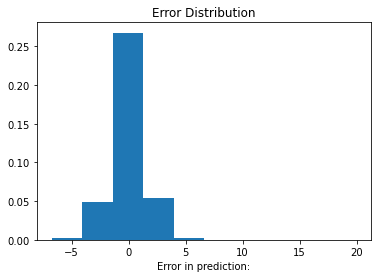

In [27]:
y_hat = reg2.predict(X2)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat - y
a1.hist(residuals, bins=10, density=True)
_ = a1.set_xlabel('Error in prediction:')
a1.set_title('Error Distribution')

**Section 3.4: Actual Values vs Predicted Values scatter plot**

The graph below shows the relationship between the actual and predicted values for the current condition.

Text(0.5, 1.0, 'Actual Values vs Predicted Values')

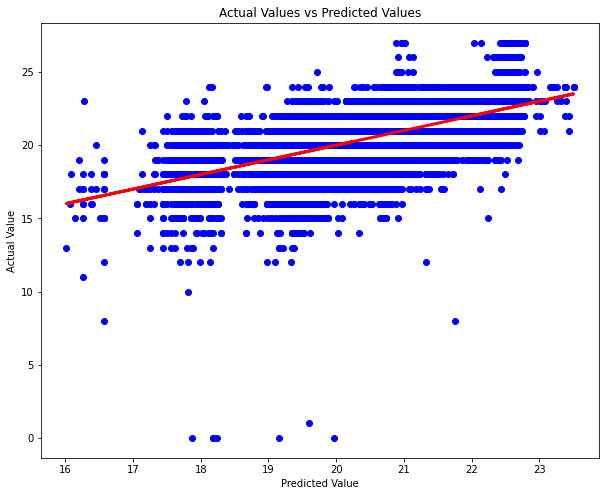

In [28]:
fig, a = plt.subplots(1,1,figsize=(10,8))
a.scatter(y_hat, y,  color='blue')
a.plot(y_hat, y_hat, color='red', linewidth=3)
a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')
a.set_title('Actual Values vs Predicted Values')

**Section 4: Conclusion**

The proposed variables may not be as efficient to predict the bridge condition. As seen above, our coefficient of determination suggested that 46% of the dependent variable is predicted by the independent variables. Also, on the exploratory analysis we could see that many of the proposed variables did not show a strong correlation to the target variable. For example, the age vs current condition scatter plot showed a small decline in the current condition scores as age increased. Furthermore, the truck traffic percentage relationship with the current condition did not show any relationship on the scatter plot, however, I would recommend that we take into consideration that the percentage of truck traffic may have decreased/increased for some bridges throughout the years. This makes it difficult to get a precise analysis between the two variables, however, by having more data we could measure their effect on other variables making factors clear. Also, some bridges may be differently affected in different sorts of environment which may also affect its condition due to the materials that they were built of. Again, this would raise more questions, for example, how a certain environment (near a river) may impact the condition of the bridge. Also, the regression modelling showed that some variables had a weak linear relationship to the dependent variable. As an example, the age and average use variables may be expected to affect the condition of the bridge, however the analysis showed that their linear relationship is very weak.

The regression coefficients were able to give us an idea of which variables may have the most influence on the current condition. The results showed that the materials and designs were the most influential variables due to their coefficient values and size. However, on the exploratory analysis section 2.4 we could see that the correlation coefficient for the age and bridge was much higher compared to the other proposed variables. Also, the scatterplot showed a slight decline on the current condition scores as age increased. With that, we may want to consider the age, material and design variables to have the most influence on the current condition based on this analysis. 
